### 统计基础
1. 描述性
* 中心位置（平均数，中位数，众数）
* 变异程度（方差，标准差，标准差系数，平均绝对偏差）
* 分布形态 (偏度，峰度）
* 相对位置
* 线性关系

In [1]:
# 中心位置
import numpy as np
import pandas as pd 
from pandas import DataFrame,Series
from scipy import stats
a=[1,2,3,4,3,4,3,4,5,4,5,6,7,4]
print(np.median(a))## 有异常值的s时候比均值更加有意义
print(np.mean(a))
print(stats.mode(a)[0][0])
xwithnan=np.hstack((a,np.nan))
print(np.nanmean(xwithnan))#带有空值的平均s数
print(stats.gmean(a))

4.0
3.9285714285714284
4
3.9285714285714284
3.5856101827117337


In [7]:
#分位数
num=np.arange(0,10)
print(np.percentile(a,50))#要用100比来表示
df=DataFrame(num)
print(df.quantile(0.5))#0-1表示

4.0
0    4.5
Name: 0.5, dtype: float64


In [44]:
###s数据的离散程度
_range=np.max(a)-np.min(a)
print(_range)
print(np.ptp(a))

6


6

In [8]:
## IQR s四分位间距，中间50%的s数据的极差
IQR=np.percentile(a,75)-np.percentile(a,25)
Q1=np.percentile(a,25)
Q3=np.percentile(a,75)

In [10]:
## 异常值 
Q1-1.5*IQR
Q3+1.5*IQR

7.375

### 方差和标准差


In [11]:
data=np.arange(7,14)
np.std(data,ddof=0)

2.0

In [13]:
np.var(data,ddof=1)

4.666666666666667

In [49]:
np.std(data,ddof=1)#numpy  没有进行无偏估计，s所以必须s设置为1，自由度，在pandas 中s默认为1

2.160246899469287

In [15]:
df=DataFrame(data)
print(df.std())#标准差
print(df.var())

0    2.160247
dtype: float64
0    4.666667
dtype: float64


In [20]:
print(stats.sem(data))
print(df.sem())

0.816496580927726
0    0.816497
dtype: float64


In [12]:
data=np.random.normal(loc=5,size=10000)
import matplotlib.pyplot as plt
% matplotlib inline

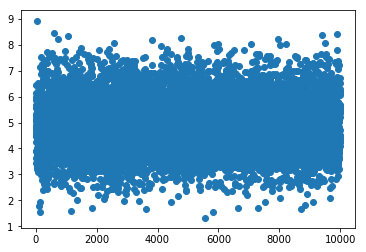

In [69]:
plt.scatter(np.arange(len(data)),data)

In [71]:
std=np.std(data)
print('std:',std)
se=std/(np.sqrt(10000))
print('se:',se)

std: 0.9929118238659399
se: 0.009929118238659398


In [64]:
np.sqrt(100)

10.0

### 偏度和峰度


In [72]:
data=np.random.randn(1000)
stats.skew(data)

-0.000159377322478371

In [74]:
stats.kurtosis(data)

-0.3202254206480526

In [76]:
data=np.random.normal(loc=3,size=100)
stats.skew(data)

0.06433180972875256

In [77]:
stats.kurtosis(data)

-0.5544991846108083

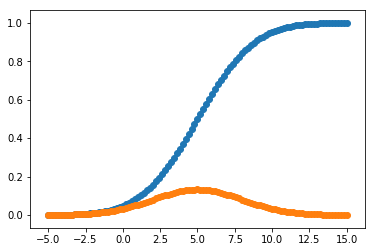

In [84]:
mydf=stats.norm(5,3)
x=np.linspace(-5,15,101)
y=mydf.cdf(x)# 积累密度函数
plt.scatter(x=x,y=y)
plt.scatter(x=x,y=mydf.pdf(x))

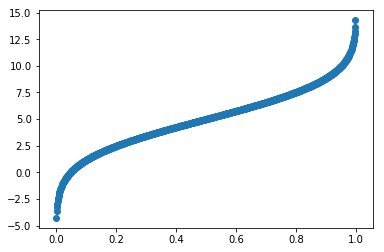

In [87]:
x1=np.linspace(0,1,1000)
y=mydf.ppf(x1)
plt.scatter(x1,y)

In [90]:
mydf.isf(0.95)

0.06543911914558365

In [93]:
mydf.cdf(5)

0.5

### 6.2 离散分布

In [101]:
p=0.5
bernoulliDist=stats.bernoulli(p)
#p_tail=bernoulliDist.pmf(0)
#p_head=bernoulliDist.pmf(1)
trails=bernoulliDist.rvs(100)
trails

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

In [97]:
p_tail

0.5

In [98]:
p_head

0.5

In [105]:
###二项式分布
binomDist=stats.binom(4,0.5)
binomDist.pmf(np.arange(5))

array([0.0625, 0.25  , 0.375 , 0.25  , 0.0625])

Text(0,0.5,'P(X)')

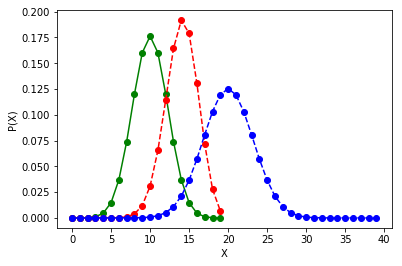

In [137]:
binomDist=stats.binom(20,0.5)
x1=np.arange(20)
y1=binomDist.pmf(x1)
fig,ax=plt.subplots(1)
ax.plot(x1,y1,'-o',color='g')

binomDist=stats.binom(20,0.7)
x2=np.arange(20)
y2=binomDist.pmf(x2)
ax.plot(x2,y2,linestyle='--',marker='o',color='r')
binomDist=stats.binom(40,0.5)
x3=np.arange(40)
y3=binomDist.pmf(x3)
ax.plot(x3,y3,linestyle='--',marker='o',color='b')
ax.set_xlabel('X')
ax.set_ylabel('P(X)')

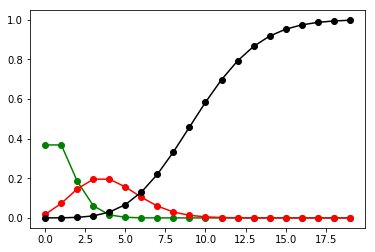

In [145]:
### 泊松分布
lamda=1
x=np.arange(20)
poisson=stats.poisson(1)
y1=poisson.pmf(x)
poisson2=stats.poisson(4)
y2=poisson2.pmf(x)
poisson3=stats.poisson(10)
y3=poisson3.cdf(x)
fig,ax=plt.subplots(1)
ax.plot(x,y1,'-o',color='g')
ax.plot(x,y2,'-o',color='r')
ax.plot(x,y3,'-o',color='k')

## 6.3 正态分布

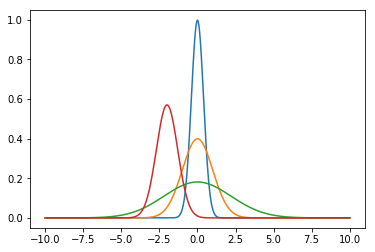

In [151]:

normDist=stats.norm(0,0.4)
x=np.linspace(-10,10,1000)
y=normDist.pdf(x)
fig,ax=plt.subplots(1)
ax.plot(x,y)
normDist=stats.norm(0,1)
x=np.linspace(-10,10,1000)
y=normDist.pdf(x)
ax.plot(x,y)
normDist=stats.norm(0,2.2)
x=np.linspace(-10,10,1000)
y=normDist.pdf(x)
ax.plot(x,y)
normDist=stats.norm(-2,0.7)
x=np.linspace(-10,10,1000)
y=normDist.pdf(x)
ax.plot(x,y)

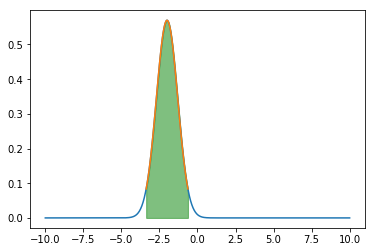

In [192]:
mu=-2
sigma=0.7
mydist=stats.norm(mu,sigma)
significanlevel=0.05

fig,ax=plt.subplots(1)
x=np.linspace(-10,10,1000)
y=mydist.pdf(x)
ax.plot(x,y)
w1,w2=mydist.ppf([0.05/2,1-0.05/2])
m=np.linspace(w1,w2)
z=mydist.pdf(x2)

#fig,ax=plt.subplots(1)
ax.plot(m,z)
plt.fill_between(m,z,interpolate=True, color='green', alpha=0.5)

In [170]:
###画颜色

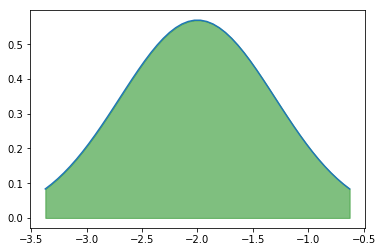

### t分布

In [185]:
n=20
df=n-1
alpha=0.05
l1=stats.t(df).isf(alpha/2)
print(l1)
l2=stats.t(df).isf(1-alpha/2)
print(l2)

2.0930240544082634
-2.093024054408263


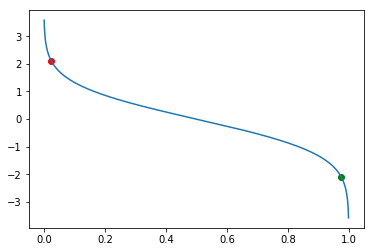

In [202]:
import numpy as np
y=stats.t(df).isf(np.linspace(0,1,1000))
x=np.linspace(0,1,1000)
plt.plot(x,y)
plt.scatter(0.05/2,l1,color='r')
plt.scatter(1-0.05/2,l2,color='g')

In [199]:
stats.norm.isf(0.05/2)

1.9599639845400545

In [203]:
n=20
df=n-1
alpha=0.05
l1=stats.t(df).ppf(alpha/2)
print(l1)
l2=stats.t(df).ppf(1-alpha/2)
print(l2)

-2.0930240544082634
2.093024054408263


In [204]:
data=[3.04,2.94,3.01,3.00,2.94,2.91,3.02,3.04,3.09,2.95,2.99,3.1,3.02]
sigma=0.05
chi2Dist=stats.chi2(len(data)-1)
statistic=sum(((data-np.mean(data))/sigma)**2)
chi2Dist.sf(statistic)

0.19293306654285156

In [207]:
chi2Dist.sf(statistic)

0.19293306654285156

In [212]:
data1=[20.7,20.3,20.3,20.3,20.7,19.9,
      19.9,19.9,20.3,20.3,19.7,20.3]
data2=[19.7,19.4,20.1,18.6,18.8,20.2,
      18.7,19.]
fval=np.var(data1,ddof=1)/np.var(data2,ddof=1)
fd=stats.f(len(data1)-1,len(data2)-1)
p_onetail=fd.cdf(fval)
if (p_onetail<0.025)|(p_onetail>0.975):
    print(p_onetail)
    
    print('There is a significant difference between the two distribution!')
else:
    print('No significant difference!')

0.018665169931411433
There is a significant difference between the two distribution!


# 练习题

In [215]:
data=np.arange(1,11)
data.mean()
np.std(data,ddof=1)

3.0276503540974917

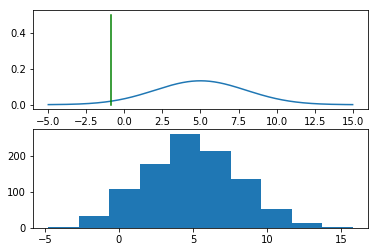

In [256]:
normdist=stats.norm(5,3)
x=np.linspace(-5,15,1000)
y=normdist.pdf(x)
fig,ax=plt.subplots(2)
ax[0].plot(x,y)
data=normdist.rvs(1000)

ax[1].hist(data,bins=10)
w1=normdist.ppf(0.025)
ax[0].plot([w1]*100,np.linspace(0,0.5,100),color='g')


In [227]:
print('std:',np.std((data-data.mean()),ddof=1))

std: 3.099949363632517


In [231]:
stats.sem(data)

0.09802900620268293

In [235]:
normdist.ppf(0.025)

-0.879891953620163

In [236]:
normdist.ppf(0.975)

10.879891953620163

In [237]:
np.std(data,ddof=1)/np.sqrt(1000)

0.09802900620268293

In [238]:
stats.sem(data)

0.09802900620268293

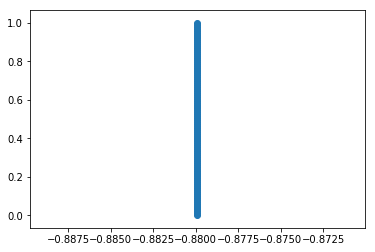

In [245]:
plt.scatter(x=[w1]*100,y=np.linspace(0,1,100))

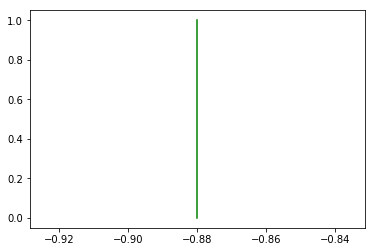

In [251]:
plt.plot([w1]*100,np.linspace(0,1,100),color='g')

In [306]:
normdist=stats.norm(0,1)
normdist.ppf(0.0005)
w1=normdist.isf(0.0005)#ppf(0.9995)
sigma=1/w1
sigma


0.3039027127266671

In [279]:
### t distribution

data=[52,70,65,85,62,83,59]
mean=np.mean(data)
t_val=(data-mean)/stats.sem(data)
stats.t(len(data)-1).ppf(0.01/2)*stats.sem(data)

-17.162056903012893

(array([313., 107.,  78.,  72.,  57.,  33.,  28.,  31.,  21.,  28.,  18.,
         12.,  19.,  23.,  12.,  16.,   8.,   8.,  12.,  11.,   9.,   4.,
          5.,   8.,   7.,   3.,   6.,   5.,   1.,   6.,   4.,   3.,   3.,
          2.,   2.,   2.,   0.,   1.,   1.,   1.,   2.,   1.,   0.,   1.,
          1.,   0.,   2.,   5.,   1.,   1.,   1.,   0.,   0.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.26864702e-08, 1.39456676e-01, 2.78913320e-01, 4.18369964e-01,
        5.57826608e-01, 6.97283251e-01, 8.36739895e-01, 9.76196539e-01,
        1.11565318e+00, 1.25510983e+00, 1.39456647e+00, 1.53402311e+00,
        1.67347976e+00, 1.81293640e+00, 1.95239304e+00, 2.09184969e+00,
        2.23130633e+00, 2.3707

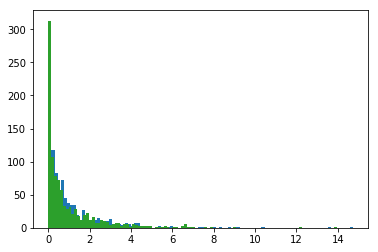

In [285]:
normdist=stats.norm(0,1)
data1=normdist.rvs(1000)
data2=normdist.rvs(1000)
data3=normdist.rvs(1000)
data1=data1**2
data2=data3**2
data3=data3**2
plt.hist(data1,bins=100)
plt.hist(data2,bins=100)
plt.hist(data3,bins=100)

In [293]:
data1=[110,121,143]
data2=[88,93,105,124]
n1=len(data1)
n2=len(data2)
fdist=stats.f(n1-1,n2-1)
f1=np.var(data1,ddof=1)
f2=np.var(data2,ddof=1)
fval=(f1)/(f2)
fdist.cdf(fval)


0.5621568448605028

### 离散的

In [296]:
p=0.37
n=15
binomdist=stats.binom(n,p)
binomdist.pmf(3)

0.09009551296310978

In [297]:
binomdist.pmf(6)

0.2007610097274685

In [298]:
binomdist.pmf(10)

0.014330961198412468

In [302]:
lam=1.19
poissondist=stats.poisson(1.19)
poissondist.pmf(0)

0.3042212640667041

In [303]:
poissondist.pmf(2)

0.2154038660224298

In [305]:
poissondist.pmf(5)

0.006049829391041528

### chart 7

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

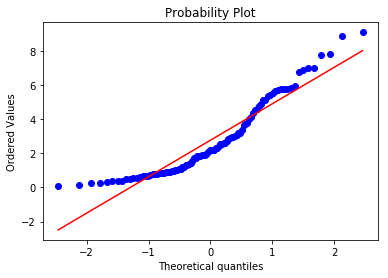

In [317]:
chi2dist=stats.chi2(3)
data=chi2dist.rvs(100)
stats.probplot(data,plot=plt)

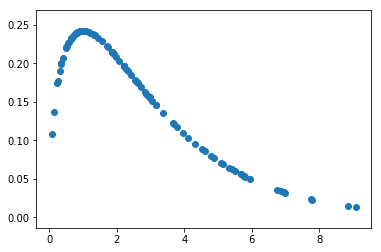

In [319]:
y=chi2dist.pdf(data)
plt.scatter(data,y)


### 正态性检验

In [339]:
#最佳拟合，通常用CDF来判断
data=stats.norm(0,1).rvs(1000)
stats.normaltest(data)

NormaltestResult(statistic=0.897048785078368, pvalue=0.6385697350124191)

In [340]:
import random
data2=random.sample(list(data),100)
stats.normaltest(data2)

NormaltestResult(statistic=8.579330365068738, pvalue=0.013709514713985219)

In [342]:
a=[1,2,3,4,5]
b=random.sample(a,2)
b

[3, 4]

In [358]:
data=[109.4,76.2,128.7,93.7,85.6,117.7,117.2,87.3,100.3,55.11]
mean=np.mean(data)

t_val=(110-mean)/stats.sem(data)
t_dist=stats.t(len(data)-1)
print(110-t_dist.isf(0.0025)*stats.sem(data),'--',110+t_dist.isf(0.0025)*stats.sem(data))
print(np.max(data),'--',np.min(data))


84.1189018178873 -- 135.88109818211268
128.7 -- 55.11


In [359]:
t_dist.cdf(t_val)

0.9502332830919252

In [361]:
t_dist.sf(t_val)*2

0.0995334338161495

mean: 6.59664162431043


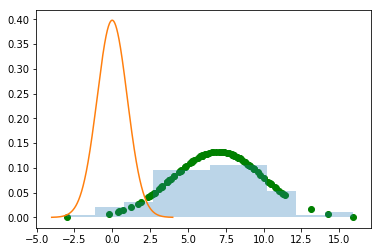

In [35]:
from scipy import stats
import numpy as np
normdist=stats.norm(7,3)
data=normdist.rvs(100)
mean=np.mean(data)
print('mean:',mean)
plt.hist(data,bins=10,density=True,alpha=0.3)
plt.scatter(data,normdist.pdf(data),color='g')
t_dist=stats.t(len(data)-1)
x=np.linspace(-4,4,1000)
y=t_dist.pdf(x)
plt.plot(x,y)

In [43]:
t_val=(mean-6.5)/stats.sem(data)
t_dist.sf(t_val)*2

0.7703530151683645

In [45]:
t,pval=stats.ttest_1samp(data,6.5)
pval

0.7703530151683645

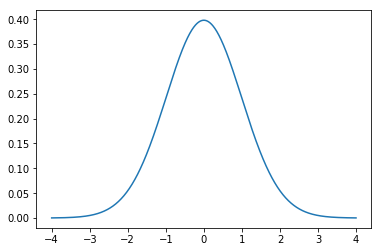

# wilcoxon 符号秩和检验

In [51]:
data=np.array([5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770])
stats.normaltest(data)

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.767466091426928, pvalue=0.6813132824061632)

In [52]:
(rank,pval)=stats.wilcoxon(data-7725)

In [53]:
pval

0.026157182329284684

In [54]:
rank

8.0

In [57]:
np.random.seed(1234)
data=np.random.randn(10)+0.1
data1=np.random.randn(10)*5
data2=data1+data
t,p_val=stats.ttest_1samp(data,0)
p_val

0.9035904508547086

In [58]:
stats.ttest_rel(data1,data2)

Ttest_relResult(statistic=0.1245849229873135, pvalue=0.9035904508547089)

In [59]:
data=np.array([5260,5470,5640,6180,6390,6515,6805,7515,7515,8230,8770])
stats.normaltest(data)

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=0.767466091426928, pvalue=0.6813132824061632)

In [60]:
stats.ttest_1samp(data,7725)#显著差异

Ttest_1sampResult(statistic=-2.8207540608310198, pvalue=0.018137235176105812)

In [61]:
stats.wilcoxon(data-7725)

WilcoxonResult(statistic=8.0, pvalue=0.026157182329284684)

In [62]:
data1=np.array([76,101,66,72,88,82,79,73,76,85,75,64,76,81,86])
data2=np.array([64,65,56,62,59,76,66,82,91,57,92,80,82,67,54])
data1.mean()

78.66666666666667

In [63]:
stats.levene(data1,data2)

LeveneResult(statistic=1.672308215682938, pvalue=0.20651779856563238)

In [66]:
stats.ttest_ind(data1,data2)

Ttest_indResult(statistic=2.0968730776547093, pvalue=0.04516066585880743)

In [65]:
data2.mean()

70.2

In [67]:
stats.normaltest(data1)

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=3.300019248176772, pvalue=0.19204806032435315)

In [68]:
stats.normaltest(data2)

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=2.1180846889333544, pvalue=0.34678775457262334)

In [73]:
stats.mannwhitneyu(data1,data2,alternative='two-sided')

MannwhitneyuResult(statistic=155.5, pvalue=0.07740194475805182)

In [78]:
np.random.seed(123)
race1=np.round(np.random.randn(20)*10+90)
race2=np.round(np.random.randn(20)*10+85)
t,pval=stats.ttest_rel(race1,race2)
print('pval',round(pval,3))

pval 0.033


In [84]:
import statsmodels.formula.api as sm
df=DataFrame({'race1':race1,'race2':race2})
result=sm.ols(formula='I(race2-race1)~1',data=df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       I(race2 - race1)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 12 Oct 2019   Prob (F-statistic):                nan
Time:                        13:33:35   Log-Likelihood:                -85.296
No. Observations:                  20   AIC:                             172.6
Df Residuals:                      19   BIC:                             173.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1000      3.950     -2.304      0.0

/Users/ccf8210/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model


## 单因素方差检验
可以s是f检验

from scipy import stats
#F_statistic,pval=stats.f_oneway(group1,group2,group3)
#statsmodels 中提供更为详细结果的方差分析，这个模型和数据表的结合更为紧密
>from statsmodels.formula.api import ols
>from statsmodels.stats.anova import anova_lm
>model=ols('value ~ C(treatment)',df).fit()
>anovaresults=anova_lm(model)

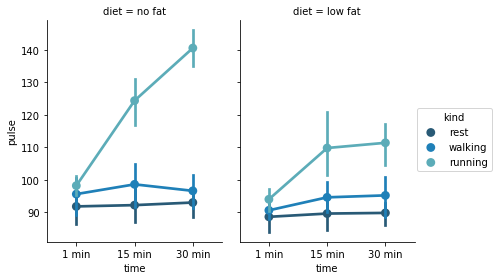

In [93]:
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


df=sns.load_dataset('exercise')
sns.factorplot('time','pulse',hue='kind',col='diet',data=df,
               palette='YlGnBu_d',aspect=.75)

## 第九章


In [95]:
data=np.array([10,6,5,4,5,3])
v,p=stats.chisquare(data)# 单因素
print(v,p)

5.363636363636364 0.37313038594870584


In [109]:
data=np.array([[43,9],[44,4]])
v,p,dof,expected=stats.chi2_contingency(data)
if p>0.05:
     print('pval:',np.round(p,4),'\nThere are no difference between Female and Male!')
else:
    print('pval:',np.round(p,4),'There are siginficant difference between Female and Male!')

pval: 0.3004 
There are no difference between Female and Male!


In [115]:
#配对检验 mcnemar检验
from statsmodels.sandbox.stats.runs import mcnemar 
obs=[[101,121],[59,33]]
chi2,p=mcnemar(obs)
print(np.round(p,5))

0.0


In [117]:
# r*c cochranc's Q 检验 响应变量只能s是1，0，的配对检验，看看有没有效果
from statsmodels.sandbox.stats.runs import cochrans_q
obs=np.array([[0,1,1,0,1,0,0,1,0,0,0,0],
              [1,1,1,0,0,1,0,1,1,1,1,1],
             [0,0,1,0,0,1,0,0,0,0,0,0]])
q_stat,p=cochrans_q(obs)
print(np.round(p,4))

0.2451


In [118]:
q_stat

13.784810126582279

In [121]:
#练习 
obs=[[3,1],[1,3]]
oddsratio,p=stats.fisher_exact(obs,alternative='greater')
p

0.24285714285714263

In [128]:
obs=[[36,14],[30,25]]
result=stats.chi2_contingency(obs)

print(result[1])

0.09966209595851808


In [132]:
obs=[[36,14],[29,26]]
result=stats.chi2_contingency(obs,correction=True)

print(result[1])

0.06727267795922476


In [133]:
obs=[4,6,14,10,16]
stats.chisquare(obs)

Power_divergenceResult(statistic=10.4, pvalue=0.03420269940871678)

In [134]:
obs=[[19,1],[6,14]]
state,p=mcnemar(obs)
print(np.round(p,3))

0.125


In [135]:
obs=[[20,0],[6,14]]
state,p=mcnemar(obs)
print(np.round(p,3))

0.031


## 第十章

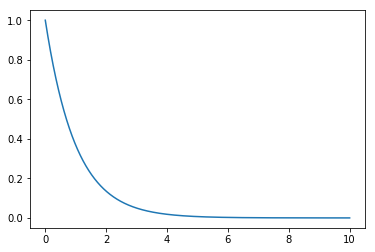

In [154]:
weibulldist=stats.weibull_min(1)
x=np.linspace(0,10,10000)
y=weibulldist.pdf(x)
plt.plot(x,y)
#z=weibulldist.cdf(x)
#plt.plot(x,z)

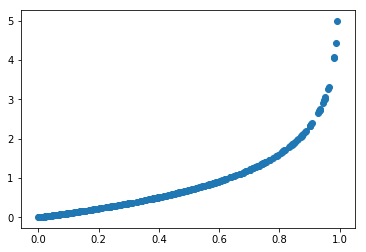

In [155]:
data=weibulldist.rvs(500)
fitpar=weibulldist.ppf(data)
plt.scatter(data,fitpar)

In [157]:
pip install lifelines


The following command must be run outside of the IPython shell:

    $ pip install lifelines

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [158]:
1+1

2

In [160]:
import lifelines

ModuleNotFoundError: No module named 'lifelines'

In [9]:
### s生存曲线
import sys
sys.version

'3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

In [3]:
import pip
import sys


In [12]:
!pip install lifelines  -i http://pypi.douban.com/simple/ --trusted-host pypi.douban.com
    



    100% |████████████████████████████████| 348kB 3.8MB/s ta 0:00:011
    100% |████████████████████████████████| 10.2MB 14.0MB/s ta 0:00:01
    100% |████████████████████████████████| 14.4MB 7.2MB/s ta 0:00:011   28% |█████████                       | 4.1MB 3.7MB/s eta 0:00:03
    100% |████████████████████████████████| 122kB 9.5MB/s ta 0:00:01
    100% |████████████████████████████████| 839kB 31.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for autograd ... done
  Stored in directory: /Users/ccf8210/Library/Caches/pip/wheels/02/05/5e/89edb7024e5ce94efda76bd510b959c2a5fa2137c5880a65d6
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /Users/ccf8210/Library/Caches/pip/wheels/02/4f/ef/08a74131846220f9fcfa710556141574fac92acee7a8795eff
Successfully built autograd future
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotl

In [13]:
import lifelines

In [16]:
from lifelines.datasets import load_waltons
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
df=load_waltons()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
T        163 non-null float64
E        163 non-null int64
group    163 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


In [17]:
df.describe()

,T,E
count,163.000000,163.000000
mean,49.613497,0.957055
std,17.078007,0.203357
min,6.000000,0.000000
25%,41.000000,1.000000
50%,56.000000,1.000000
75%,61.000000,1.000000
max,75.000000,1.000000


In [19]:
df.group

0      miR-137
1      miR-137
2      miR-137
3      miR-137
4      miR-137
        ...   
158    control
159    control
160    control
161    control
162    control
Name: group, Length: 163, dtype: object

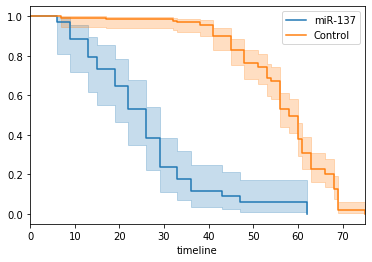

In [35]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1)
T=df.T
E=df.E
groups=df.group
df1=df[df['group']=='miR-137']
df2=df[df['group']!='miR-137']
kmf=KaplanMeierFitter()
obs=kmf.fit(df1['T'],df1['E'],label='miR-137')
obs.plot(ax=ax)
countrol=kmf.fit(df2['T'],df2['E'],label='Control')
countrol.plot(ax=ax)
plt.show()
#kmf.fit

In [36]:
results=logrank_test(df1['T'],df2['T'],event_observed_A=df1['E'],event_observed_B=df2['E'])
results.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1

---
 test_statistic      p  -log2(p)
         122.25 <0.005     91.99


## 第11章 ，线性回归分析

In [15]:
import numpy as np
from pandas import DataFrame,Series
import pandas as pd
import matplotlib.pyplot as plt



In [17]:
import statsmodels.formula.api as smf


In [56]:
import cython
import scipy

In [ ]:
import statsmodels.api as sm 

In [13]:
x=np.arange(100)
y=150+3*x+0.03*x**2+5*np.random.randn(len(x))
M1=np.vstack((np.ones_like(x),x)).T
M2=np.vstack((np.ones_like(x),x,x**2)).T
M3=np.vstack((np.ones_like(x),x**2,x**3)).T
###解方程
p1=np.linalg.lstsq(M1,y)
p2=np.linalg.lstsq(M2,y)
p3=np.linalg.lstsq(M3,y)

np.set_printoptions(precision=3)
print(p1[0])
print(p2[0])
print(p3[0])

[102.342   5.953]
[1.502e+02 3.025e+00 2.957e-02]
[ 1.801e+02  9.781e-02 -4.253e-04]


/Users/ccf8210/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys
/Users/ccf8210/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/Users/ccf8210/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence 

In [33]:
x=np.arange(20)
y=150+3*x+0.03*x**2+5*np.random.randn(len(x))
from statsmodels.formula.api import ols
df=DataFrame({'x':x,'y':y})
#res1F=ols('y ~C(x)',data=df).fit()
df.head()

,x,y
0,0,160.478175
1,1,151.609980
2,2,155.980802
3,3,159.657673
4,4,163.344427
